# Mall Customers Data Analysis: Income & Spending Behavior Insights

In this analysis, I explore the Customers dataset to understand customer inocme and spending patterns. The dataset contains customer demographics, annual income, and spending score data. This dataset is sourced from [Kaggle Mall Customers Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

**Objective:**
To privide insights for mall management to guide pricing, marketing, and segmentation strategies.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Inspection

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
df.shape

(200, 5)

## Descriptive Statistics

### Annual Income

In [40]:
# Mean, Median, Mode, Variance, Standard Deviation of Annual Income
mean_annual_income = df["Annual Income (k$)"].mean()
median_annual_income = df["Annual Income (k$)"].median()
mode_annual_income = df["Annual Income (k$)"].mode()[0]
annual_income_var = df["Annual Income (k$)"].var()
annual_income_std = df["Annual Income (k$)"].std()

print("Mean Annual Income: {}".format(mean_annual_income))
print("Median Annual Income: {}".format(median_annual_income))
print("Mode Annual Income: {}".format(mode_annual_income))
print("Variance of Annual Income: {}".format(annual_income_var))
print("Standard deviation of Annual Income: {}".format(annual_income_std))

Mean Annual Income: 60.56
Median Annual Income: 61.5
Mode Annual Income: 54
Variance of Annual Income: 689.8355778894472
Standard deviation of Annual Income: 26.264721165271244


### Spending Score

In [41]:
# Mean, Median, Mode, Variance, Standard Deviation of Spending Score
mean_spending_score = df["Spending Score (1-100)"].mean()
median_spending_score = df["Spending Score (1-100)"].median()
mode_spending_score = df["Spending Score (1-100)"].mode()[0]
spending_score_var = df["Spending Score (1-100)"].var()
spending_score_std = df["Spending Score (1-100)"].std()

print("Mean Spending Score: {}".format(mean_spending_score))
print("Median Spending Score: {}".format(median_spending_score))
print("Mode Spending Score: {}".format(mode_spending_score))
print("Spending Score Variance: {}".format(spending_score_var))
print("Spending Score Standatd Deviation: {}".format(spending_score_std))

Mean Spending Score: 50.2
Median Spending Score: 50.0
Mode Spending Score: 42
Spending Score Variance: 666.8542713567839
Spending Score Standatd Deviation: 25.823521668370173


## IQR and Outlier Detection

### Spending Score

In [42]:
# Spending Score Q1, Q2, and Q3
spending_score_q1 = df["Spending Score (1-100)"].quantile(.25)
spending_score_q2 = df["Spending Score (1-100)"].quantile(.50)
spending_score_q3 = df["Spending Score (1-100)"].quantile(.75)

# Spending Score IQR, lower bound, and upper bound
spending_score_iqr = spending_score_q3 - spending_score_q1
spending_score_lower_bound = spending_score_q1 - 1.5*(spending_score_iqr)
spending_score_upper_bound = spending_score_q3 + 1.5*(spending_score_iqr)

# Spending Score Outliers
df_spending_score_outlier = df[(df["Spending Score (1-100)"] < spending_score_lower_bound) | (df["Spending Score (1-100)"] > spending_score_upper_bound)]
df_spending_score_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [43]:
# Max and Min of Spending Score
max_spending_score = df["Spending Score (1-100)"].max()
min_spending_score = df["Spending Score (1-100)"].min()

print("Maximum Spending Score: ", max_spending_score)
print("Minimum Spending Score: ", min_spending_score)

Maximum Spending Score:  99
Minimum Spending Score:  1


### Annual Income

In [44]:
# Annual Income Q1, Q2, and Q3
income_q1 = df["Annual Income (k$)"].quantile(.25)
income_q2 = df["Annual Income (k$)"].quantile(.50)
income_q3 = df["Annual Income (k$)"].quantile(.75)

# Annual Income IQR, lower bound, and upper bound
income_iqr = income_q3 - income_q1
income_lower_bound = income_q1 - 1.5*(income_iqr)
income_upper_bound = income_q3 + 1.5*(income_iqr)

# Annual Income Outliers
df_income_outlier = df[(df["Annual Income (k$)"] < income_lower_bound) | (df["Annual Income (k$)"] > income_upper_bound)]
df_income_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [45]:
# DataSet without Annual Income Outliers
df_without_income_outlier = df[(df["Annual Income (k$)"] > income_lower_bound) & (df["Annual Income (k$)"] < income_upper_bound)]

# Max and Min of Dataset without Annual Income Outliers
print("Maximum Annual Income without outliers: ", df_without_income_outlier["Annual Income (k$)"].max())
print("Minimum Annual Income without outliers: ", df_without_income_outlier["Annual Income (k$)"].min())

Maximum Annual Income without outliers:  126
Minimum Annual Income without outliers:  15


## Skewness and Kurtosis

### Spending Score

In [46]:
# Skewness and Kurtosis of Spending Score
spending_score_skewness = df["Spending Score (1-100)"].skew()
spending_score_kurtosis = df["Spending Score (1-100)"].kurt()

print("Spending Score Skewness: ", spending_score_skewness)
print("Spending Score Kurtosis: ", spending_score_kurtosis)

Spending Score Skewness:  -0.047220201374263374
Spending Score Kurtosis:  -0.8266291062061502


### Annual Income

In [47]:
# Skewness and Kurtosis of Annual Income
annual_income_skewness = df["Annual Income (k$)"].skew()
annual_income_kurtosis = df["Annual Income (k$)"].kurt()

print("Annual Income Skewness: ", annual_income_skewness)
print("Annual Income Kurtosis: ", annual_income_kurtosis)

Annual Income Skewness:  0.3218425498619055
Annual Income Kurtosis:  -0.09848708652696203


## Visualizations

### Histogram of Annual Income

Text(0.5, 1.0, 'Distribution of Annual Income')

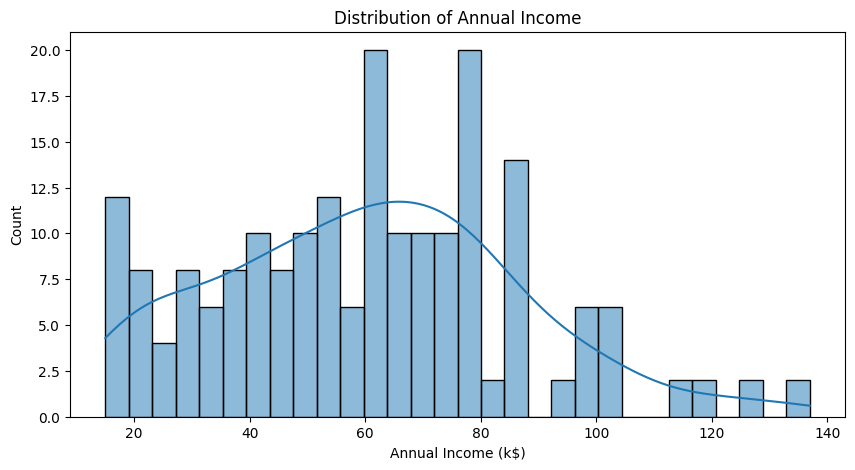

In [48]:
plt.figure(figsize = (10,5))
sns.histplot(df["Annual Income (k$)"], bins = 30, kde = True)
plt.title("Distribution of Annual Income")

### Box Plot of Spending Score

Text(0.5, 1.0, 'Box Plot of Spending Score')

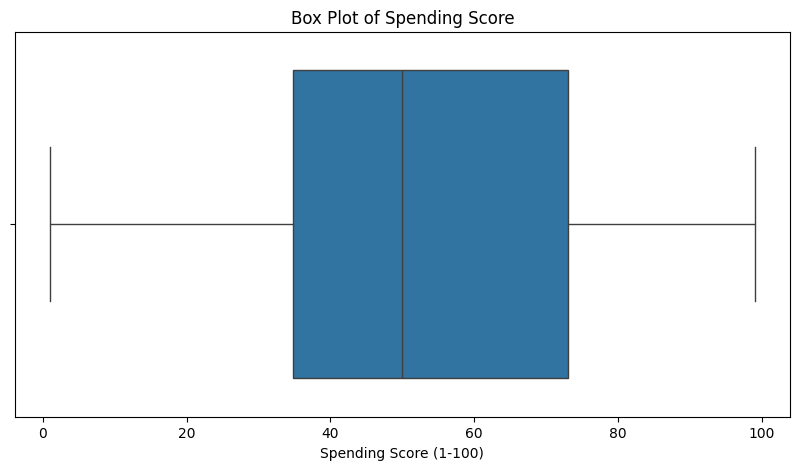

In [49]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df["Spending Score (1-100)"])
plt.title("Box Plot of Spending Score")

## Insights and Recommendations

**Insights:**
- The average customer's Annual income is \\$60,560 with a slight skew sugggesting that most customers are middle-income earners.
- Spending Scores are evenly distributed, indicating diverse customer behaviour.

**Recommendations:**

- Segment customers by spending score for targeted marketing.
- Consider premium services for high-income earners.

## Conclusion

The analysis provides key insights into mall customers' income and spending behaviour to inform marketing and pricing decisions for optimized customer engagement